Naive Bayes of Labeled Record Data (Genres & Price)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/Users/qbs//games.csv")


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert genres into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Genres'].fillna(''))

# Binning the price into discrete labels
labels = ['0-0.99', '1-1.99', '2-2.99', '3-3.99', '4-4.99', '5+']
df['price_bins'] = pd.cut(df['Price'], bins=[-1, 0.99, 1.99, 2.99, 3.99, 4.99, float('inf')], labels=labels)

# Convert price bins to discrete numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['price_bins'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

      0-0.99       0.90      0.28      0.43      5004
      1-1.99       0.43      0.00      0.00      1432
      2-2.99       0.00      0.00      0.00      1284
      3-3.99       0.00      0.00      0.00       874
      4-4.99       0.00      0.00      0.00      1901
          5+       0.45      0.99      0.62      7434

    accuracy                           0.49     17929
   macro avg       0.30      0.21      0.18     17929
weighted avg       0.47      0.49      0.38     17929



/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


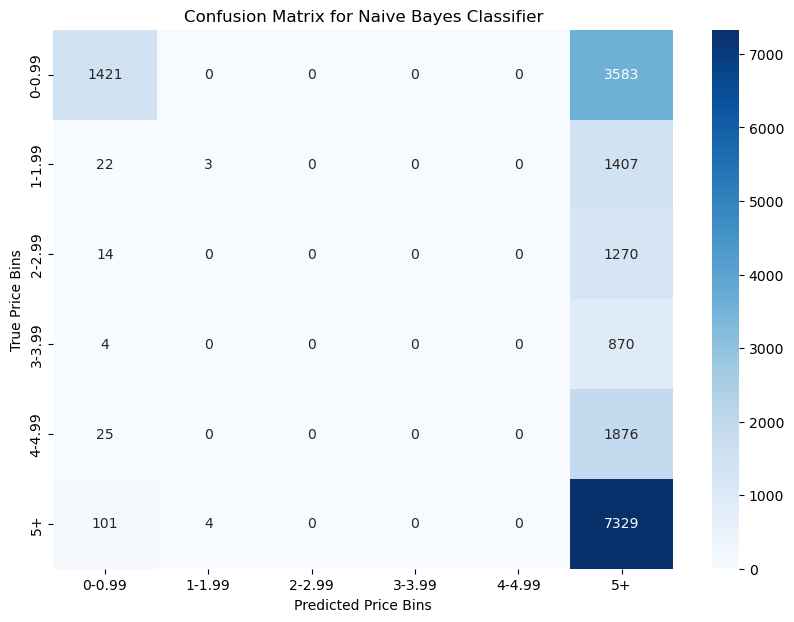

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Price Bins')
plt.ylabel('True Price Bins')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


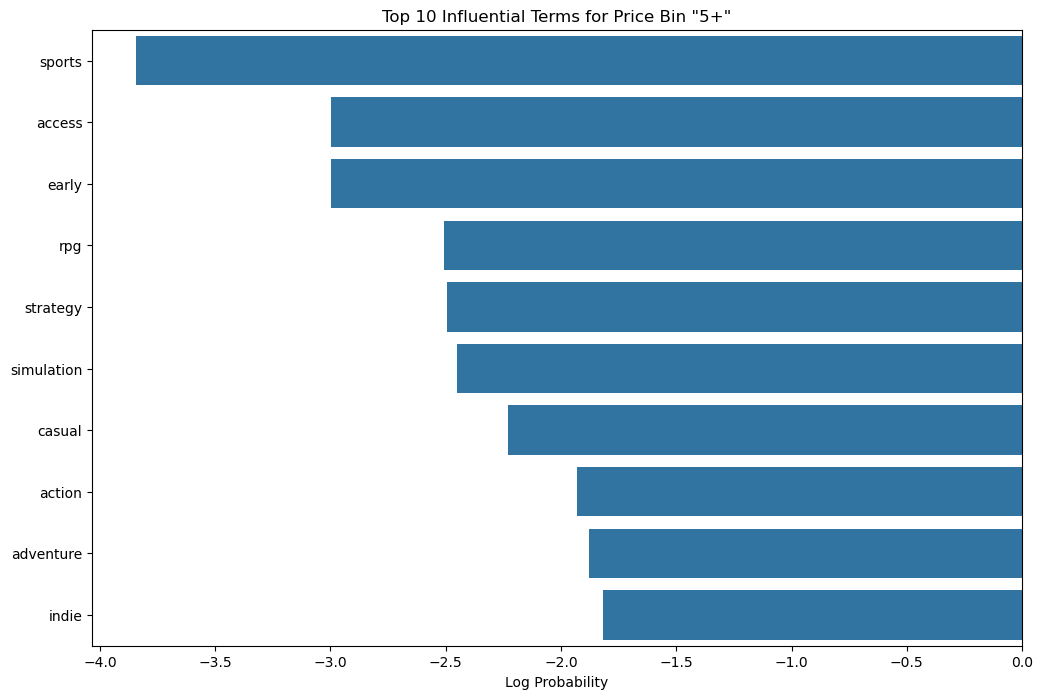

In [28]:
import numpy as np

# Get the log probabilities for the "5+" price bin
feature_log_probs = nb_classifier.feature_log_prob_[label_encoder.transform(['5+'])[0]]

# Get top 10 influential terms
top_indices = np.argsort(feature_log_probs)[-10:]
top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_log_probs[top_indices], y=top_terms)
plt.title('Top 10 Influential Terms for Price Bin "5+"')
plt.xlabel('Log Probability')
plt.show()


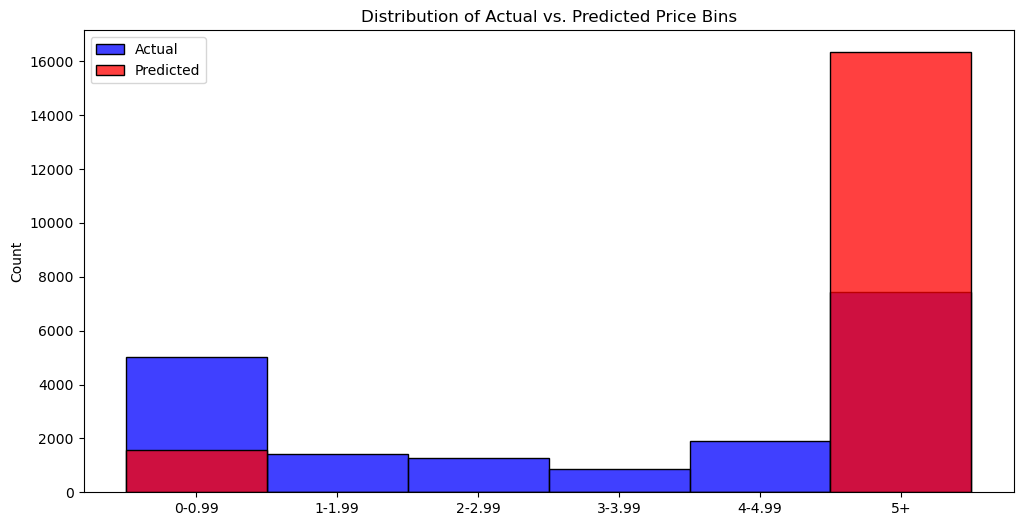

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, label='Actual', color='blue', bins=np.arange(len(labels)+1)-0.5)
sns.histplot(y_pred, label='Predicted', color='red', bins=np.arange(len(labels)+1)-0.5)
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.title('Distribution of Actual vs. Predicted Price Bins')
plt.legend()
plt.show()


Naives Bayes of Labeled Text Data (Genres & Positive)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df['Genres'].fillna('missing', inplace=True)
df['Genres'].dropna()
df['Positive'].dropna()
# Extracting the 'genres' column and labels
X_text = df['Genres']
y_text = df['Positive']

# Convert genres to a matrix of token counts
vectorizer = CountVectorizer()
X_text_vect = vectorizer.fit_transform(X_text)

# Splitting the dataset
X_train_text, X_temp_text, y_train_text, y_temp_text = train_test_split(X_text_vect, y_text, test_size=0.4, random_state=42)
X_val_text, X_test_text, y_val_text, y_test_text = train_test_split(X_temp_text, y_temp_text, test_size=0.5, random_state=42)


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Training the model
nb_text_classifier = MultinomialNB()
nb_text_classifier.fit(X_train_text, y_train_text)

# Predicting on test data
y_pred_text = nb_text_classifier.predict(X_test_text)

# Evaluation
print(confusion_matrix(y_test_text, y_pred_text))
print(classification_report(y_test_text, y_pred_text))
print("Accuracy:", accuracy_score(y_test_text, y_pred_text))


[[3081   42    0 ...    0    0    0]
 [ 766   30    0 ...    0    0    0]
 [ 644   28    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.22      0.98      0.36      3152
           1       0.09      0.04      0.05       818
           2       0.00      0.00      0.00       680
           3       0.00      0.00      0.00       551
           4       0.00      0.00      0.00       467
           5       0.00      0.00      0.00       372
           6       0.00      0.00      0.00       345
           7       0.18      0.01      0.01       309
           8       0.00      0.00      0.00       258
           9       0.00      0.00      0.00       241
          10       0.00      0.00      0.00       201
          11       0.00      0.00      0.00       220
          12       0.00      0.00      0.00       225
          13   

/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qbs/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qbs/anaconda3/lib/python3.10/site-p

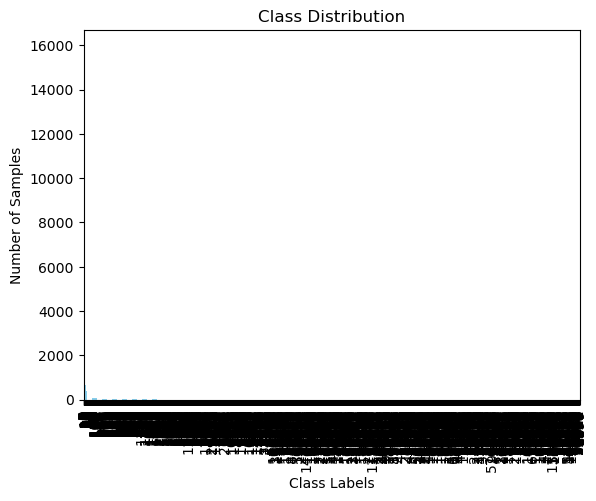

In [20]:
import matplotlib.pyplot as plt

label_counts = df['Positive'].value_counts()
label_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Class Labels')
plt.show()


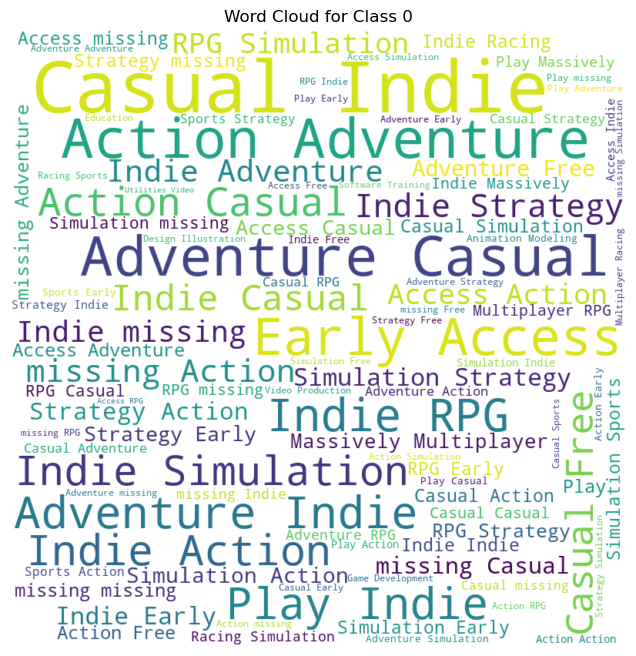

In [21]:
from wordcloud import WordCloud

class_0_texts = ' '.join(df[df['Positive'] == 0]['Genres'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(class_0_texts)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Class 0')
plt.show()


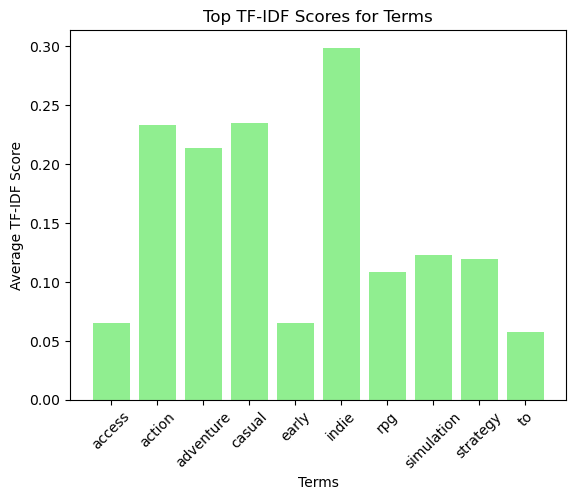

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(df['Genres'])

# Average TF-IDF scores across all samples
avg_tfidf_scores = np.mean(tfidf_matrix.toarray(), axis=0)
top_terms = vectorizer.get_feature_names_out()

plt.bar(top_terms, avg_tfidf_scores, color='lightgreen')
plt.title('Top TF-IDF Scores for Terms')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Terms')
plt.xticks(rotation=45)
plt.show()
